<a href="https://colab.research.google.com/github/limkaram/Natural_language_processing_with_deep_learning/blob/main/Keras_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras 훑어보기

1. 전처리(Preprocessing)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
fit_text = 'The earth is an awesome place live'
tokenizer.fit_on_texts([fit_text])  # 리스트를 입력으로 줌

test_text = 'The earth is an awesome place live'
sequences = tokenizer.texts_to_sequences([test_text])  # 리스트를 입력으로 줌

print(sequences)  # texts_to_sequences() 입력으로 들어간 sequences를 정수 인코딩해줌
print(tokenizer.word_index)  # fit_on_texts() 입력으로 들어간 sequences에 정수 인덱싱을 부여한 단어와 인덱싱을 보여줌
print(tokenizer.word_counts)  # fit_on_texts() 입력으로 들어간 sequences를 토큰화 후 Sequences내 토큰별 갯수를 보여줌

* Tokenizer : 토큰화와 정수 인코딩을 위해 활용됨

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')
# 전처리가 끝나서 각 단어에 대한 정수 인코딩이 끝났다고 가정하고, 3개의 데이터를 입력


* pad_sequences : sequences의 padding을 해줌
* pad_sequences의 입력은 정수 인코딩이 완료된 list of list를 넣어주어야함
* maxlen은 모든 데이터에 대해서 정규화할 길이
* padding='pre'로 하면, 앞에서부터 0을 채워넣음
* padding='post'로 하면, 뒤에서부터 0을 채워넣음

2. 워드 임베딩(Word Embedding)
* 텍스트 내의 단어들을 밀집 벡터(Dense Vector)로 만드는 것
* 훈련 backpropagation 과정에서 가중치가 함께 최적화됨
* 벡터내 값의 타입이 원-핫 벡터와 다르게 실수 값을 가짐
* 원-핫 벡터와 같은 희소 벡터(Sparse Vector)와 달리 저차원을 가짐(ex. 256, 512, 1024 차원)
* 따라서 입력층과 은닉층 사이에서 Embedding Layer를 구성하여 활용됨

In [ ]:
# 하기 코드는 의사 코드(pseudo-code)로 실행은 되지 않음

# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

# 각 단어 정수 인코딩 및 패딩 시행
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7, 2, input_length=5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embeddig()은 각 단어에 대해 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+
# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

* Embedding() 입력 : 2D 텐서
* Embedding() 출력 : 3D 텐서
* Embedding() 입력 인자
    - 첫번째 인자 : 단어 집합(Vocabulary)의 크기. 즉, 총 단어의 개수
    - 두번째 인자 : 임베딩 벡터의 출력 차원(결과의 임베딩 벡터 크기)
    - input_length : 입력 sequence 길이

3. 모델링(Modeling)

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

# model.add(...)  # 층 추가
# model.add(...)  # 층 추가
# model.add(...)  # 층 추가

* 실제로는 ... 대신에 층의 이름을 기재해야함

3-1. embedding() : 임베딩 층을 추가할 경우

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(embedding(vocabulary_size, output_dim, input_length))

3-2. Dense() : Fully-connected Layer을 추가할 경우

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

* 첫번째 인자 : 출력 뉴련의 수
* input_dim : 입력 뉴런의 수(입력의 차원)
* activation : 활성화 함수
    - 활성화 함수 미지정시 Default = 'linear'
    - 'sigmoid' : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수(Logistic Regression)
    - 'softmax' : 셋 이상을 분류하는 Multi-class Classification 문제의 출력층에 주로 사용되는 활성화 함수
    - 'relu' : 은닉층에 주로 사용되는 활성화 함수

3-3. summary() : 모델의 정보를 요약해서 보여줌

In [ ]:
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
=================================================================
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
'''

4. 컴파일(Compile)과 훈련(Training)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

* optimizer : 훈련 과정을 설정하는 옵티마이저 설정
    - 'adam'
    - 'sgd'
    - 'rmsprop'
* metrics : 훈련을 모니터링하기 위한 지표 선택
* loss : 손실 함수(loss function) 설정
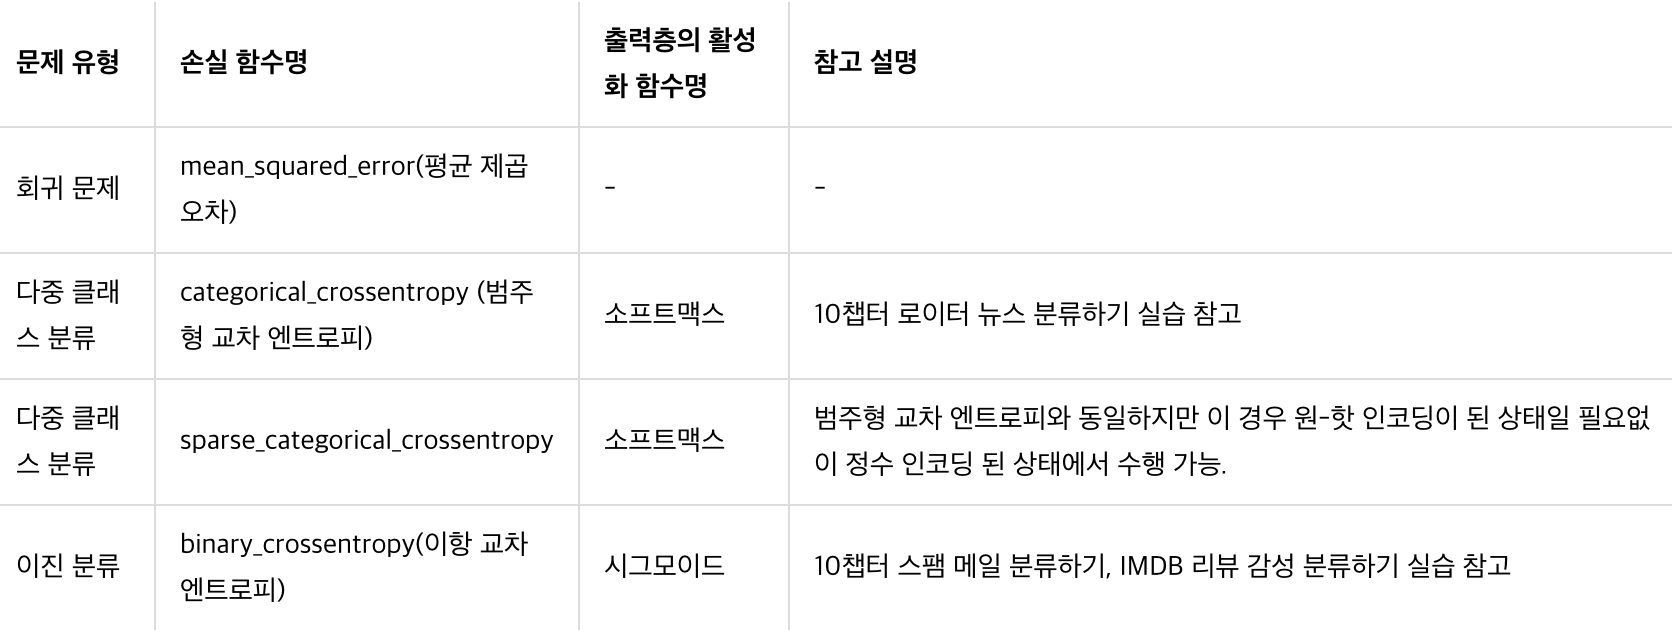

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

* 첫번째 인자 : 훈련 데이터
* 두번째 인자 : 지도 학습에서 레이블 데이터
* epochs : 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미하며, 정수값 기재 필요
* batch_size : 배치 크기(Default=32)로 미니 배치 경사 하강법을 사요하고 싶지 않을 경우 batch_size=None 기재
* validation_data(x_val, y_val) : 검증 데이터(validation data)를 사용, 검증 데이터 사용시 각 에포트마다 검증 데이터의 정확도도 함께 출력되어 훈련이 잘되고 있는지 보여줄 뿐이고, 학습 자체는 학습 데이터로만 진행함
    - 검증 데이터의 loss가 낮아지다가 높아지면 과적합(overfittin)의 신호
* validation_split : validation_data 대신 사용할 수 있으며, 검증 데이터를 사용하는 것은 동일하지만 별도의 검증 데이터를 주는 것이 아닌 학습 데이터에서 일정 비율을 분리하여 검증 데이터로 활용됨
* verbose : 학습 중 출력되는 문구 설정
    - 0 : 아무 것도 출력하지 않음
    - 1 : 훈련의 진행도를 보여주는 진행 막대 표시
    - 2 : 미니 배치마다 손실 정보를 출력

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

5. 평가(Evaluation)와 예측(Prediction)

In [ ]:
# model.fit()이 완료된 이후 활용
model.evaluate(X_test, y_test, batch_size=32)

* 첫번째 인자 : 테스트 데이터
* 두번째 인자 : 지도 학습에서 레이블 테스트 데이터
* batch_size : 배치 크기

In [ ]:
model.predict(X_input, batch_size=32)

* 첫번째 인자 : 예측하고자 하는 데이터
* batch_size : 배치 크기

6. 모델의 저장(Save)과 로드(Load)

In [ ]:
# 인공 신경망 모델을 hdf5 파일에 저장
model.save('model_name.h5')

# 저장해둔 모델을 불러옴
from tensorflow.keras.models import load_model
model = load_model('model_name.h5')